<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

# Construire une pyramide des ages

Ce notebook illustre la lecture d'un fichier csv et la visualisation des données au travers de diagrammes en barre. Les données sont la population française par sexe au 1er Janvier 2016. L'objectif est alors de construire la pyramide des ages de la population française.

1. [Lecture des données](#1.-Lecture-des-données)
    1. [En utilisant les fonctions internes de python](#En-utilisant-les-fonctions-internes-de-python)
    2. [Avec numpy](#Avec-numpy)
2. [Graphiques simples](#2.-Graphiques-simples)
    1. [Barres verticales](#Barres-verticales)
    2. [Barres horizontales](#Barres-horizontales)
3. [Pyramide des ages](#3.-Pyramide-des-ages)
    1. [Dans un seul graphique](#Dans-un-seul-graphique)
    2. [Avec un axe secondaire](#Avec-un-axe-secondaire)
    3. [Avec deux `subplots`](#Avec-deux-subplots)
4. [*Stacked bar*](#4.-Stacked-Bar)
5. [Avec Pandas](#5.-Avec-Pandas)

Tout d'abord importons `numpy` et `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Lecture des données

Nous allons lire les données dans le fichier `popfr2016.csv`. Les première lignes de ce fichier sont :

    annee;age;hommes;femmes;total
    2015;0;1945338;1855372;3800710
    2010;5;2058056;1960489;4018545
    2005;10;2034130;1939082;3973212
    2000;15;2002292;1906973;3909265
    
Il s'agit d'un fichier de type `csv`. Chaque ligne correspond à une tranche d'âges ou d'années de naissance (tranche de 5 ans). L'année de naissance, l'âge, le nombre d'hommes, le nombre de femmes et le nombre total de personnes sont donnés sur chaque ligne, séparés par des points-virgules.

Source : [INED, Institut National d'Études Démographiques](http://www.ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/pyramide-ages/)

### En utilisant les fonctions internes de python

La stratégie est la suivante :

1. On initialise des listes pour chaque colonne
2. On ouvre le fichier avec un contexte (instruction `with`)
3. On parcours le fichier ligne par ligne
    * On saute la première ligne
    * Sur chaque ligne on découpe (`split`) suivant le point-virgule et on convertit en nombre entier
    * On attribue chaque élément à une liste
    
<div class="alert alert-info" style="margin-top:20px;">
<b>Exercice :</b> Écrire le code permettant de lire le fichier. Vous pouvez, entre autre, suivre la stragégie décrite ci-dessus.
</div>

In [2]:
annees = list()
age = list()
hommes = list()
femmes = list()
total = list()
with open("popfr2016.csv", "r") as f:
    # read the first line
    f.readline()
    # read line by line
    for line in f:
        # split at each ; and convert to int
        data = [int(val) for val in line.split(";")]
        # append the lists
        annees.append(data[0])
        age.append(data[1])
        hommes.append(data[2])
        femmes.append(data[3])
        total.append(data[4])

### Avec numpy

Nous allons utiliser la méthode [`loadtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) de [`numpy`](https://docs.scipy.org/doc/numpy/index.html) qui permet de lire, avec une certaine souplesse, les fichiers de ce type.

In [3]:
# on ne lit pas la dernière colonne
annees, age, hommes, femmes = np.loadtxt(
    "popfr2016.csv", 
    delimiter=";", 
    unpack=True, 
    usecols=(0, 1, 2, 3),
    skiprows=1
)

## 2. Graphiques simples

À partir des données lues sur le fichier, on peut commencer par créer un diagramme en barre, verticale ou horizontale. Pour ce faire on utilisera les méthodes `plt.bar` ou `plt.barh` de matplotlib. 

### Barres verticales

Nous allons commencer par un diagramme en barre verticale, avec la fonction `plt.bar`.

<div class="alert alert-info" style="margin-top:20px;">
Commençons par regarder la documentation de cette fonction.<br/> 
Regarder le rôle des arguments `left`, `height` et `width`.<br/>
Représenter le nombre de femmes par tranche d'âge avec un diagramme en barre.
</div>

In [4]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
    Make a bar plot.
    
    Make a bar plot with rectangles bounded by:
    
      `left`, `left` + `width`, `bottom`, `bottom` + `height`
            (left, right, bottom and top edges)
    
    Parameters
    ----------
    left : sequence of scalars
        the x coordinates of the left sides of the bars
    
    height : sequence of scalars
        the heights of the bars
    
    width : scalar or array-like, optional
        the width(s) of the bars
        default: 0.8
    
    bottom : scalar or array-like, optional
        the y coordinate(s) of the bars
        default: None
    
    color : scalar or array-like, optional
        the colors of the bar faces
    
    edgecolor : scalar or array-like, optional
        the colors of the bar edges
    
    linewidth : scalar or array-like, optional
        width of bar edge(s). If None, use default
      

<Container object of 22 artists>

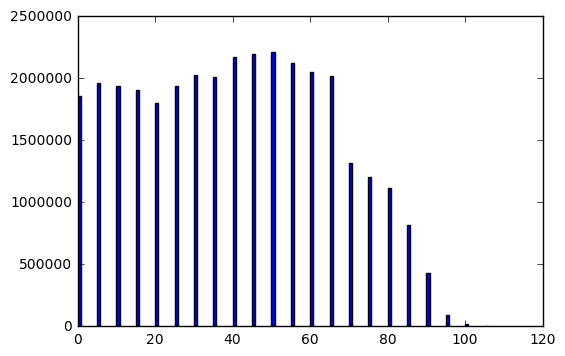

In [5]:
plt.bar(left=age, height=femmes)

<div class="alert alert-info">
<ul>
    <li>Ajouter un titre</li>
    <li>Ajouter le titre des axes</li>
    <li>Ajuster la largeur des barres</li>
    <li>Optionnel : Changer les couleurs à votre convenance</li>
</ul>
</div>

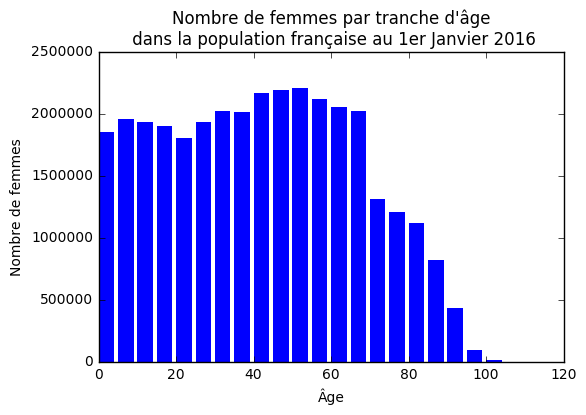

In [6]:
plt.bar(
    left=age, 
    height=femmes, 
    width=4,
    color="blue",
    linewidth=0
)
plt.xlabel("Âge")
plt.ylabel("Nombre de femmes")
plt.title("Nombre de femmes par tranche d'âge\n dans la population française au 1er Janvier 2016")

### Barres horizontales

Il existe deux façons d'obtenir un tel diagramme : soit via une option de `plt.bar`, soit avec la fonction `plt.barh`

<div class="alert alert-info" style="margin-top:20px">
Reprendre le travail ci-dessus sous la forme d'un diagramme en barre horizontale.
</div>

#### Avec `plt.bar`

En fait `plt.bar` dispose d'une option permettant d'obtenir des barres horizontales :

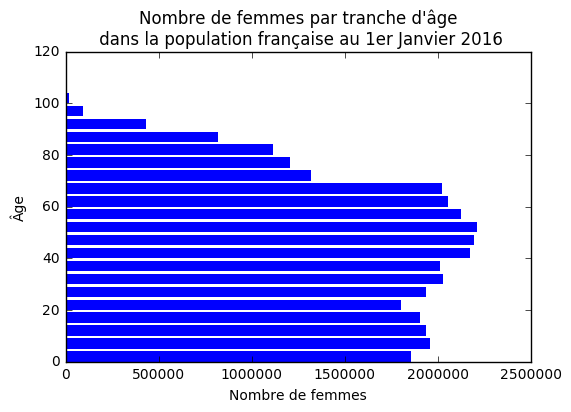

In [7]:
plt.bar(
    bottom=age,
    left=0,     # no effect here
    height=4,
    width=femmes,
    color="blue",
    linewidth=0,
    orientation="horizontal"
)
plt.xlabel("Nombre de femmes")
plt.ylabel("Âge")
plt.title("Nombre de femmes par tranche d'âge\n dans la population française au 1er Janvier 2016")

#### Avec `plt.barh`

La fonction de matplotlib adaptée à la réalisation de diagramme en barre horizontale est la fonction `plt.barh` :

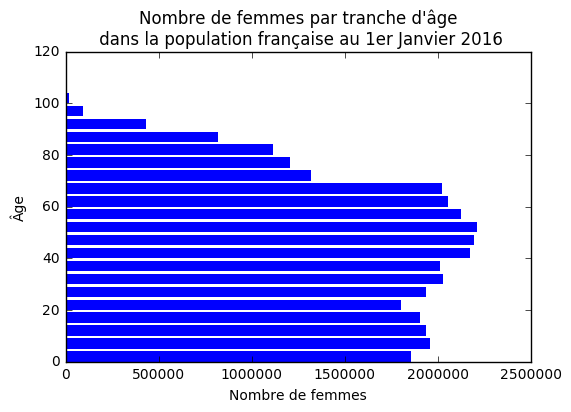

In [8]:
plt.barh(
    bottom=age,
    height=4,
    width=femmes,
    color="blue",
    linewidth=0
)
plt.xlabel("Nombre de femmes")
plt.ylabel("Âge")
plt.title("Nombre de femmes par tranche d'âge\n dans la population française au 1er Janvier 2016")

## 3. Pyramide des ages

Pour constuire la pyramide des âges, il va falloir accoler deux diagrammes en barres horizontales : Vers la gauche pour les hommes et vers la droite pour les femmes. Par habitude, la partie concernant le hommes est bleu, celle concernant les femmes est rose/rouge.

### Dans un seul graphique

<div class="alert alert-info" style="margin-top:20px;">
Construire la pyramide des âges avec les deux diagrammes en barre dans le même graphique.
</div>

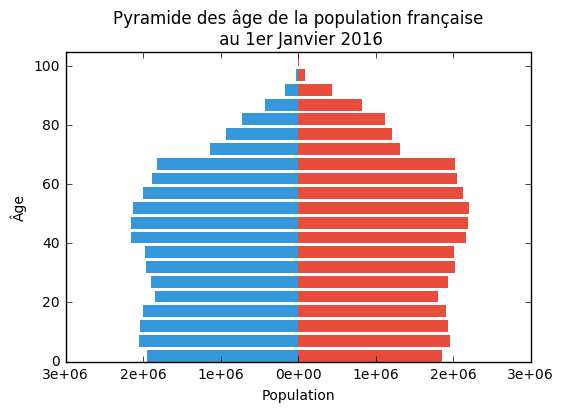

In [9]:
plt.barh(
    bottom=age, 
    width=-hommes,
    height=4,
    linewidth=0,
    color="#3498db"
)
plt.barh(
    bottom=age, 
    width=femmes,
    height=4,
    linewidth=0,
    color="#e74c3c"
)
plt.title("Pyramide des âge de la population française\n au 1er Janvier 2016")
plt.xlabel("Population")
plt.ylabel("Âge")
plt.ylim((0,105))
# pour supprimer le signe moins
locs, labels = plt.xticks()
locs, labels = plt.xticks(locs, ["%4.0e" % abs(val) for val in locs])

### Avec un axe secondaire

Jusqu'à présent nous avons utilisé l'âge de la population. On pourrait également afficher l'année de naissance sur un axe secondaire. On va pour cela utiliser la fonction `plt.twiny` pour duppliquer le graphique courant.

<div class="alert alert-info" style="margin-top:20px;">
Construire la pyramide des âges avec les deux diagrammes en barre dans le même graphique et sur un axe secondaire faire apparaître l'année de naissance.
</div>

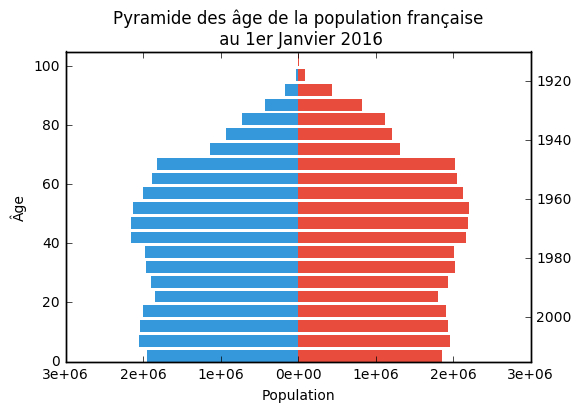

In [10]:
plt.barh(
    bottom=age, 
    width=-hommes,
    height=4,
    linewidth=0,
    color="#3498db"
)
plt.barh(
    bottom=age, 
    width=femmes,
    height=4,
    linewidth=0,
    color="#e74c3c"
)
plt.title("Pyramide des âge de la population française\n au 1er Janvier 2016")
plt.xlabel("Population")
plt.ylabel("Âge")
plt.ylim((0,105))
# pour supprimer le signe moins
locs, labels = plt.xticks()
locs, labels = plt.xticks(locs, ["%4.0e" % abs(val) for val in locs])

# axe secondaire twinx = meme x et y différent
ax = plt.twinx()
ax.set_ylim((annees.min(), annees.max()))
ax.invert_yaxis()

### Avec deux `subplots`

Une autre façon de faire, est d'utiliser des subplots en créant un graphique pour chaque sexe. Cette approche peut permettre plus de souplesses dans le rendu du graphique.

<div class="alert alert-info" style="margin-top:20px;">
Construire la pyramide des âges avec un diagramme dans un `subplot` qui lui est propre. Voici quelques recommandations :
<ul>
    <li>Créer une figure avec deux subplots qui partage l'axe y</li>
    <li>L'espace entre les axes est réduit à zéro</li>
    <li>Chaque subplot contient un diagramme en barre</li>
    <li>Il faut inverser l'un des axes des abscisses.</li>
</ul>
</div>

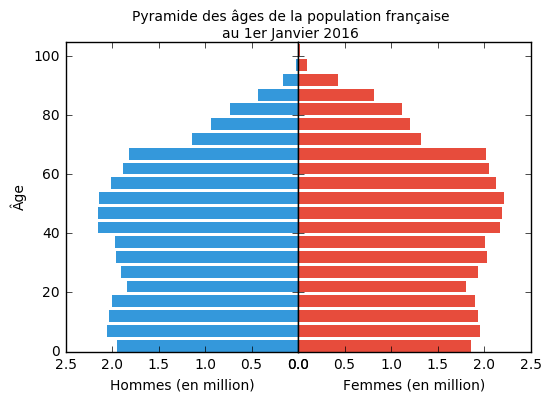

In [11]:
# figure : 1 ligne 2 colonnes
fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, gridspec_kw={"wspace": 0})

# gauche, hommes
axes[0].barh(
    bottom=age,
    width=hommes / 1e6,
    height=4,
    linewidth=0,
    color="#3498db"
)
# inverser l'axe des abscisse
axes[0].invert_xaxis()
axes[0].set_xlabel("Hommes (en million)")
axes[0].set_ylabel("Âge")

# droite femmes
axes[1].barh(
    bottom=age, 
    width=femmes / 1e6,
    height=4,
    linewidth=0,
    color="#e74c3c"
)
axes[1].set_ylim((0, 105))
axes[1].set_xlabel("Femmes (en million)")

fig.suptitle("Pyramide des âges de la population française\nau 1er Janvier 2016")

## 4. Stacked Bar

Un façon courrante d'utiliser les diagrammes en barre lorsqu'on veut représenter plusieurs quantité, consiste à les supperposer. Le second commençant à la hauteur du premier pour une abscisse donnée. C'est notamment utiliser lorsque la somme des différentes quantité est constante (100% par exemple).

<div class="alert alert-info" style="margin-top:20px;">
Construire un diagramme en barre où les barres correspondant au nombre de femmes commence à la hauteur des barres correspondant aux nombres d'hommes.
<ul>
    <li>Regarder dans la documentation le paramètre nécessaire</li>
    <li>Représenter le graphique</li>
    <li>Ajouter une légende</li>
    <li>Ajouter un titre et les titres des axes</li>
</ul>
</div>

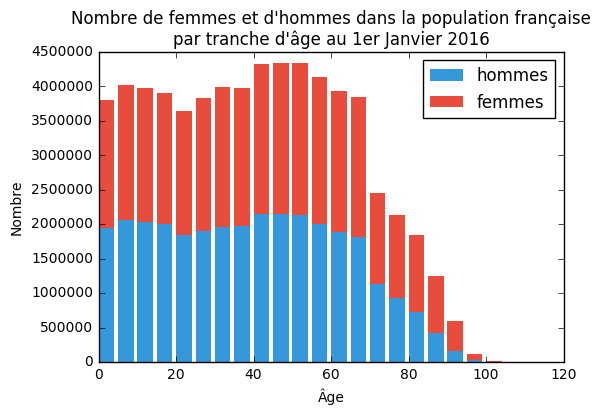

In [12]:
plt.bar(left=age, height=hommes, width=4, color="#3498db", linewidth=0, label="hommes")
plt.bar(left=age, height=femmes, bottom=hommes, width=4, color="#e74c3c", linewidth=0, label="femmes")
plt.title("Nombre de femmes et d'hommes dans la population française\npar tranche d'âge au 1er Janvier 2016")
plt.xlabel("Âge")
plt.ylabel("Nombre")
plt.legend()

## 5. Avec Pandas

La librairie [pandas](http://pandas.pydata.org/), pour Python Data Analysis Library, est une librairie particulièrement bien adapté pour réaliser ce type de graphique. Voici comment ce problème aurait pu être traité avec cette librairie.

Commençons par charger le module pandas :

In [13]:
import pandas as pd

#### Lecture du fichier

In [14]:
df = pd.read_csv("popfr2016.csv", sep=";", index_col=0)
df.head()

age   hommes   femmes    total
annee                                
2015     0  1945338  1855372  3800710
2010     5  2058056  1960489  4018545
2005    10  2034130  1939082  3973212
2000    15  2002292  1906973  3909265
1995    20  1840860  1802421  3643281

In [15]:
# nouvelle colonne
df["-hommes"] = -df.hommes
df.head()

age   hommes   femmes    total  -hommes
annee                                         
2015     0  1945338  1855372  3800710 -1945338
2010     5  2058056  1960489  4018545 -2058056
2005    10  2034130  1939082  3973212 -2034130
2000    15  2002292  1906973  3909265 -2002292
1995    20  1840860  1802421  3643281 -1840860

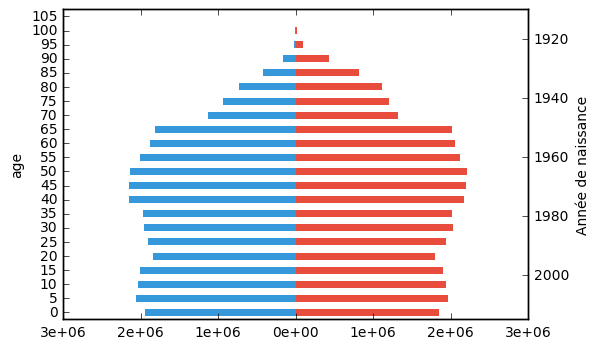

In [16]:
# figure
fig = plt.figure()
ax = fig.add_subplot(111)

# gauche, hommes
df.plot.barh(
    y="-hommes",
    x="age",
    width=.5,
    ax=ax,
    label="hommes",
    legend=False,
    facecolor="#3498db",
    linewidth=0,
)

# droite femmes
df.plot.barh(
    y="femmes",
    x="age",
    width=.5,
    ax=ax,
    label="femmes",
    legend=False,
    facecolor="#e74c3c",
    linewidth=0
)

# pour supprimer le signe moins
locs = ax.get_xticks()
ax.set_xticklabels(["%4.0e" % abs(val) for val in locs])

# axe secondaire twinx = meme x et y différent
ax2 = ax.twinx()
ax2.set_ylim((annees.min(), annees.max()))
ax2.invert_yaxis()
ax2.set_ylabel("Année de naissance")